In [7]:
# 필요한 라이브러리 로드

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 필요한 csv 파일을 로드하여 데이터프레임 생성 // ** 제출 전에 path 통일 후 수정 필요

order_items = pd.read_csv('./data_in/order_items.csv')
products = pd.read_csv('./data_in/products.csv')
sellers = pd.read_csv('./data_in/sellers.csv')

# 각 데이터프레임의 로드 상황 확인

order_items.head(), products.head(), sellers.head()

(      Order_id  Order_item_id     Product_id    Seller_id  Price  \
 0  ORDER_75477              1  PRODUCT_23128  SELLER_0452   58.9   
 1  ORDER_63604              1  PRODUCT_24351  SELLER_0414  239.9   
 2  ORDER_05566              1  PRODUCT_20226  SELLER_1637  199.0   
 3  ORDER_04632              1  PRODUCT_07878  SELLER_1445  199.9   
 4  ORDER_61452              1  PRODUCT_03505  SELLER_0581   21.9   
 
    Freight_value  
 0          13.29  
 1          19.93  
 2          17.87  
 3          18.14  
 4          12.69  ,
       Product_id Product_category_name Product_weight_g Product_length_cm  \
 0  PRODUCT_00000             perfumery            225.0              16.0   
 1  PRODUCT_00001                  arts           1000.0              30.0   
 2  PRODUCT_00002        sports_leisure            154.0              18.0   
 3  PRODUCT_00003        home_utilities            625.0              20.0   
 4  PRODUCT_00004   musical_instruments            200.0              38.

In [17]:
order_items['Order_item_id'].describe()

count    100557.000000
mean          1.199678
std           0.713168
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: Order_item_id, dtype: float64

In [4]:
# `Price`(판매 가격)와 `Order_item_id`(주문 내 상품 수)를 곱하여 `Revenue`(매출) 컬럼 생성

order_items['Revenue'] = order_items['Price'] * order_items['Order_item_id']

In [5]:
# 셀러별 매출의 합 집계

seller_revenue = order_items.groupby('Seller_id')['Revenue'].sum().reset_index()

# 셀러별 상품 다양성 집계

seller_product_diversity = order_items.groupby('Seller_id')['Product_id'].nunique().reset_index()

# 셀러별 총 매출과 상품 다양성을 하나의 데이터프레임으로 병합

seller_analysis = pd.merge(seller_revenue, seller_product_diversity, on='Seller_id')
seller_analysis.rename(columns={'Product_id': 'Unique_Product_Count'}, inplace=True)

# 위 과정이 올바르게 진행되었는 지 확인

seller_analysis.head(), seller_analysis.describe()

(     Seller_id   Revenue  Unique_Product_Count
 0  SELLER_0000    229.50                     3
 1  SELLER_0001  11643.07                    30
 2  SELLER_0002    167.99                     1
 3  SELLER_0003    179.70                     1
 4  SELLER_0004   3644.25                    30,
              Revenue  Unique_Product_Count
 count    2761.000000           2761.000000
 mean     4951.681065             11.103948
 std     15496.602891             24.171183
 min         6.500000              1.000000
 25%       225.100000              2.000000
 50%       954.400000              4.000000
 75%      3729.930000             10.000000
 max    277914.590000            382.000000)

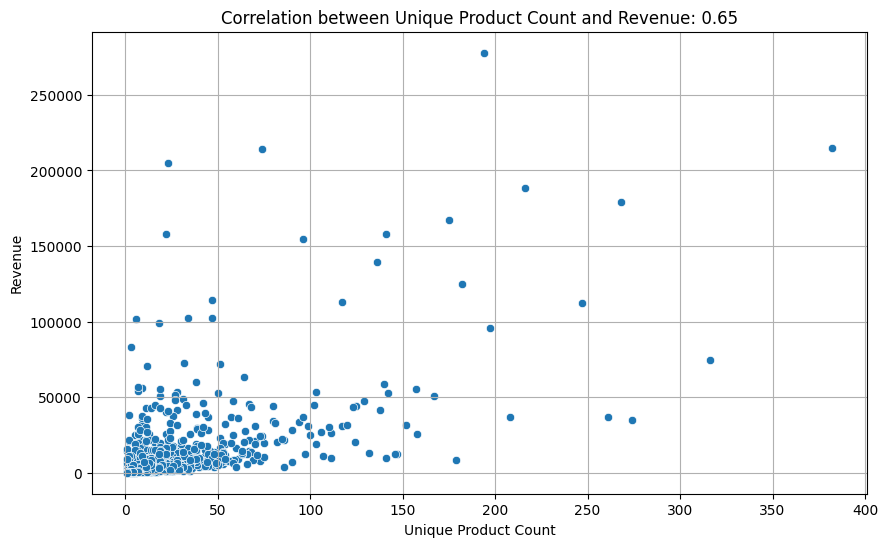

셀러의 상품 다양성과 총 매출의 상관계수는 "0.6499834035048537" 입니다


In [12]:
# 셀러의 상품 다양성과 총 매출의 상관계수 계산
correlation = seller_analysis['Unique_Product_Count'].corr(seller_analysis['Revenue'])

# 상관관계를 산점도로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=seller_analysis, x='Unique_Product_Count', y='Revenue')
plt.title(f'Correlation between Unique Product Count and Revenue: {correlation:.2f}')
plt.xlabel('Unique Product Count')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# 상관계수 출력

print(f'셀러의 상품 다양성과 총 매출의 상관계수는 "{correlation}" 입니다')

### 2. 판매자 별 상품의 종류 수, 취급하는 카테고리 수와 판매자 총 매출의 연관성 확인

In [13]:
# 주문당 제품 카테고리 확인 위해 `order_items`와 `products` 병합

order_products = pd.merge(order_items, products, on='Product_id', how='left')

# 데이터 정상 로드 확인

order_products.head()

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value,Revenue,Product_category_name,Product_weight_g,Product_length_cm,Product_height_cm,Product_width_cm
0,ORDER_75477,1,PRODUCT_23128,SELLER_0452,58.9,13.29,58.9,cool_stuff,650.0,28.0,9.0,14.0
1,ORDER_63604,1,PRODUCT_24351,SELLER_0414,239.9,19.93,239.9,pet_shop,30000.0,50.0,30.0,40.0
2,ORDER_05566,1,PRODUCT_20226,SELLER_1637,199.0,17.87,199.0,furniture_decor,3050.0,33.0,13.0,33.0
3,ORDER_04632,1,PRODUCT_07878,SELLER_1445,199.9,18.14,199.9,garden_tools,3750.0,35.0,40.0,30.0
4,ORDER_61452,1,PRODUCT_03505,SELLER_0581,21.9,12.69,21.9,home_utilities,450.0,24.0,8.0,15.0


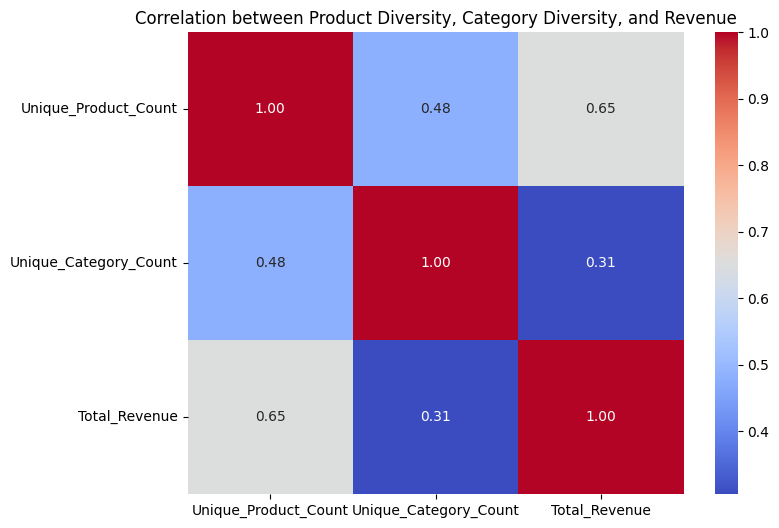

                       Unique_Product_Count  Unique_Category_Count  \
Unique_Product_Count               1.000000               0.476152   
Unique_Category_Count              0.476152               1.000000   
Total_Revenue                      0.649983               0.305067   

                       Total_Revenue  
Unique_Product_Count        0.649983  
Unique_Category_Count       0.305067  
Total_Revenue               1.000000  


In [14]:
# `Seller_id`로 그룹화 하여 상품 명과 카테고리 집계 

seller_analysis = order_products.groupby('Seller_id').agg(
    Unique_Product_Count=('Product_id', 'nunique'),
    Unique_Category_Count=('Product_category_name', 'nunique'),
    
    # 총 매출 계산
    
    Total_Revenue=('Revenue', 'sum')
).reset_index()

# 계산 확인

seller_analysis.head()

# 상품명, 카테고리 수와 총 매출간의 연관성 계산

correlation_matrix = seller_analysis[['Unique_Product_Count', 'Unique_Category_Count', 'Total_Revenue']].corr()

# 상관관계 히트맵으로 시각화

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Product Diversity, Category Diversity, and Revenue')
plt.show()

# 상관계수 출력

print(correlation_matrix)

#### 결과 (상관관계)
- 상품의 종류와 매출의 상관관계 : 약 0.65으로 높은 상관관계 확인
- 카테고리의 종류와 매출의 상관관계 : 약 0.31으로 낮은 상관관계 확인
- cf. 상품의 종류와 카테고리 종류의 상관관계 : 약 0.48으로 낮은 상관관계 확인